# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as grid_spec
import matplotlib.lines as lines
import seaborn as sns
plt.rcParams["font.family"] = "Georgia"

## Import data

In [2]:
contacts = pd.read_csv('C:/Users/MazaherGhorbani/Desktop/Interview Cases/N26/Ops Data Analyst Case Study 2/\
ops_case_study__contacts.csv')
surveys = pd.read_csv('C:/Users/MazaherGhorbani/Desktop/Interview Cases/N26/Ops Data Analyst Case Study 2/\
ops_case_study__surveys.csv')
specialists = pd.read_csv('C:/Users/MazaherGhorbani/Desktop/Interview Cases/N26/Ops Data Analyst Case Study 2/\
ops_case_study__specialists.csv')
users = pd.read_csv('C:/Users/MazaherGhorbani/Desktop/Interview Cases/N26/Ops Data Analyst Case Study 2/\
ops_case_study__users.csv')
DimDate = pd.read_excel('C:/Users/MazaherGhorbani/Desktop/Interview Cases/N26/dimdates.xlsx')

## Data cleaning

In [3]:
# First, lets explore shape of data
print('------------------------------------')
print('Shape of data')
print('------------------------------------')
print('contacts:\t', contacts.shape)
print('surveys:\t', surveys.shape)
print('specialists:\t', specialists.shape)
print('users:\t\t', users.shape)
print('------------------------------------')

------------------------------------
Shape of data
------------------------------------
contacts:	 (75014, 16)
surveys:	 (5032, 5)
specialists:	 (202, 4)
users:		 (42323, 8)
------------------------------------


In [4]:
# Know your data one by one
# 1) contacts
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75014 entries, 0 to 75013
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                75014 non-null  object 
 1   cs_tag            75014 non-null  object 
 2   channel           75014 non-null  object 
 3   channel_type      75014 non-null  object 
 4   contact_language  68730 non-null  object 
 5   cst_initiated     75014 non-null  bool   
 6   abandoned         75000 non-null  object 
 7   is_inhouse        75014 non-null  bool   
 8   initiated_date    75014 non-null  object 
 9   contact_date      66053 non-null  object 
 10  product           56357 non-null  object 
 11  wait_time         75000 non-null  float64
 12  handle_time       66053 non-null  float64
 13  specialist_id     75014 non-null  object 
 14  user_id           56357 non-null  object 
 15  link_id           546 non-null    object 
dtypes: bool(2), float64(2), object(12)
memor

In [5]:
contacts.isnull().sum()

id                      0
cs_tag                  0
channel                 0
channel_type            0
contact_language     6284
cst_initiated           0
abandoned              14
is_inhouse              0
initiated_date          0
contact_date         8961
product             18657
wait_time              14
handle_time          8961
specialist_id           0
user_id             18657
link_id             74468
dtype: int64

In [6]:
# dealing with null values
contacts.dropna(subset=['abandoned'], inplace=True)
contacts.drop(axis=1, columns=['link_id'], inplace=True)
contacts.fillna({'contact_language': 'Unknown', 'product': 'Unknown', 'user_id': 'Unknown'}, inplace=True)
contacts.isnull().sum()

id                     0
cs_tag                 0
channel                0
channel_type           0
contact_language       0
cst_initiated          0
abandoned              0
is_inhouse             0
initiated_date         0
contact_date        8947
product                0
wait_time              0
handle_time         8947
specialist_id          0
user_id                0
dtype: int64

In [7]:
# dealing with data types
contacts[['initiated_date', 'contact_date']] = contacts[['initiated_date', 'contact_date']].astype('datetime64')
contacts['initiated_date_key'] = contacts['initiated_date'].dt.date.astype('datetime64')
contacts['contact_date_key'] = contacts['contact_date'].dt.date.astype('datetime64')
contacts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 1 to 75013
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  75000 non-null  object        
 1   cs_tag              75000 non-null  object        
 2   channel             75000 non-null  object        
 3   channel_type        75000 non-null  object        
 4   contact_language    75000 non-null  object        
 5   cst_initiated       75000 non-null  bool          
 6   abandoned           75000 non-null  object        
 7   is_inhouse          75000 non-null  bool          
 8   initiated_date      75000 non-null  datetime64[ns]
 9   contact_date        66053 non-null  datetime64[ns]
 10  product             75000 non-null  object        
 11  wait_time           75000 non-null  float64       
 12  handle_time         66053 non-null  float64       
 13  specialist_id       75000 non-null  object    

In [8]:
contacts.head(3)

,id,cs_tag,channel,channel_type,contact_language,cst_initiated,abandoned,is_inhouse,initiated_date,contact_date,product,wait_time,handle_time,specialist_id,user_id,initiated_date_key,contact_date_key
1,c53424,not_tagged,chat,1st level,fr,True,True,True,2020-06-20 16:53:04,NaT,Unknown,151.0,NaN,s201,Unknown,2020-06-20,NaT
2,c52674,not_tagged,chat,1st level,de,True,True,True,2020-06-20 10:56:51,NaT,Unknown,150.0,NaN,s201,Unknown,2020-06-20,NaT
3,c52689,not_tagged,chat,1st level,de,True,True,True,2020-06-20 11:04:12,NaT,Unknown,82.0,NaN,s201,Unknown,2020-06-20,NaT


In [9]:
# 2) surveys
surveys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5032 entries, 0 to 5031
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   contact_id          5032 non-null   object
 1   response_date       5032 non-null   object
 2   agent_satisfaction  5032 non-null   int64 
 3   csat                5032 non-null   int64 
 4   issue_resolved      5032 non-null   bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 162.3+ KB


In [10]:
# just need a small data type transformation
surveys['response_date'] = surveys['response_date'].astype('datetime64')
surveys['response_date'] = surveys['response_date'].dt.date.astype('datetime64')
surveys.head(3)

,contact_id,response_date,agent_satisfaction,csat,issue_resolved
0,c53109,2020-06-21,9,8,True
1,c52087,2020-06-21,10,8,False
2,c52532,2020-06-21,4,4,False


In [11]:
# 3) specialists
specialists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          202 non-null    object
 1   is_inhouse  202 non-null    bool  
 2   hired_at    200 non-null    object
 3   full_name   202 non-null    object
dtypes: bool(1), object(3)
memory usage: 5.1+ KB


In [12]:
# just need a small data type transformation
specialists['hired_at'] = specialists['hired_at'].astype('datetime64')
specialists.head(3)

,id,is_inhouse,hired_at,full_name
0,s32,False,2019-02-06,Taylor Swift
1,s64,False,2019-05-10,Jennifer Aniston
2,s96,True,2019-08-29,George Clooney


In [13]:
# 4) users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42323 entries, 0 to 42322
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  42323 non-null  object
 1   signed_up_at        42323 non-null  object
 2   has_activated_card  42323 non-null  bool  
 3   closed_account_at   7448 non-null   object
 4   tnc_country_group   42323 non-null  object
 5   os                  42323 non-null  object
 6   first_name          38543 non-null  object
 7   last_name           38543 non-null  object
dtypes: bool(1), object(7)
memory usage: 2.3+ MB


In [14]:
users.isnull().sum()

id                        0
signed_up_at              0
has_activated_card        0
closed_account_at     34875
tnc_country_group         0
os                        0
first_name             3780
last_name              3780
dtype: int64

In [15]:
users['full_name'] = users['first_name'] + users['last_name']
users['full_name'].fillna('Unknown', inplace=True)
users.drop(axis=1, columns=['first_name', 'last_name'], inplace=True)
users[['closed_account_at', 'signed_up_at']] = users[['closed_account_at', 'signed_up_at']].astype('datetime64')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42323 entries, 0 to 42322
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  42323 non-null  object        
 1   signed_up_at        42323 non-null  datetime64[ns]
 2   has_activated_card  42323 non-null  bool          
 3   closed_account_at   7448 non-null   datetime64[ns]
 4   tnc_country_group   42323 non-null  object        
 5   os                  42323 non-null  object        
 6   full_name           42323 non-null  object        
dtypes: bool(1), datetime64[ns](2), object(4)
memory usage: 2.0+ MB


In [16]:
users.head(3)

,id,signed_up_at,has_activated_card,closed_account_at,tnc_country_group,os,full_name
0,u15586,2019-02-28,False,NaT,ITA,android,BruceFuller
1,u38150,2020-05-28,False,NaT,DEU,android,MitchellColeman
2,u11771,2018-11-01,True,NaT,FRA,iOS,JulianThornton


In [17]:
# 5) DimDate
DimDate.head(3)

,DateNum,Date,YearMonthNum,Calendar_Quarter,MonthNum,MonthName,MonthShortName,WeekNum,DayNumOfYear,DayNumOfMonth,DayNumOfWeek,DayName,DayShortName,Quarter,YearQuarterNum,DayNumOfQuarter
0,19910101,1991-01-01,199101,Qtr 1,1,January,Jan,1,1,1,3,Tuesday,Tue,1,19911,1
1,19910102,1991-01-02,199101,Qtr 1,1,January,Jan,1,2,2,4,Wednesday,Wed,1,19911,2
2,19910103,1991-01-03,199101,Qtr 1,1,January,Jan,1,3,3,5,Thursday,Thu,1,19911,3


## Data understanding

In [18]:
contacts.describe(include='all', datetime_is_numeric=True)

,id,cs_tag,channel,channel_type,contact_language,cst_initiated,abandoned,is_inhouse,initiated_date,contact_date,product,wait_time,handle_time,specialist_id,user_id,initiated_date_key,contact_date_key
count,75000,75000,75000,75000,75000,75000,75000,75000,75000,66053,75000,75000.000000,66053.000000,75000,75000,75000,66053
unique,75000,20,2,3,6,2,2,2,NaN,NaN,4,NaN,NaN,202,41567,NaN,NaN
top,c52552,not_tagged,chat,1st level,fr,True,False,False,NaN,NaN,A,NaN,NaN,s201,Unknown,NaN,NaN
freq,1,15424,67100,67100,27876,69913,65675,44242,NaN,NaN,45893,NaN,NaN,8891,18645,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-16 02:15:42.338490112,2020-06-15 18:36:00.832674560,NaN,55.450760,714.360635,NaN,NaN,2020-06-15 12:59:17.375691008,2020-06-15 05:25:19.888248320
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-01 04:59:12,2020-06-01 04:59:15,NaN,0.000000,0.000000,NaN,NaN,2020-06-01 00:00:00,2020-06-01 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-08 14:53:01,2020-06-08 11:21:34,NaN,4.000000,290.000000,NaN,NaN,2020-06-08 00:00:00,2020-06-08 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-16 09:31:18.500000,2020-06-15 18:25:42,NaN,5.000000,591.000000,NaN,NaN,2020-06-16 00:00:00,2020-06-15 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-23 17:17:08.750000128,2020-06-23 13:16:44,NaN,53.000000,976.000000,NaN,NaN,2020-06-23 00:00:00,2020-06-23 00:00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-30 21:01:15,2020-06-30 21:01:16,NaN,7212.000000,6966.000000,NaN,NaN,2020-06-30 00:00:00,2020-06-30 00:00:00


In [19]:
surveys.describe(include='all', datetime_is_numeric=True)

,contact_id,response_date,agent_satisfaction,csat,issue_resolved
count,5032,5032,5032.000000,5032.000000,5032
unique,5032,NaN,NaN,NaN,2
top,c27100,NaN,NaN,NaN,True
freq,1,NaN,NaN,NaN,3527
mean,NaN,2020-06-15 22:15:50.079489536,8.408188,8.075517,NaN
min,NaN,2020-06-01 00:00:00,1.000000,1.000000,NaN
25%,NaN,2020-06-08 00:00:00,8.000000,7.000000,NaN
50%,NaN,2020-06-16 00:00:00,10.000000,9.000000,NaN
75%,NaN,2020-06-24 00:00:00,10.000000,10.000000,NaN
max,NaN,2020-07-23 00:00:00,10.000000,10.000000,NaN


In [20]:
specialists.describe(include='all', datetime_is_numeric=True)

,id,is_inhouse,hired_at,full_name
count,202,202,200,202
unique,202,2,NaN,201
top,s20,False,NaN,Marilyn Monroe
freq,1,122,NaN,2
mean,NaN,NaN,2019-08-06 18:50:24,NaN
min,NaN,NaN,2017-01-29 00:00:00,NaN
25%,NaN,NaN,2019-03-29 00:00:00,NaN
50%,NaN,NaN,2019-09-15 00:00:00,NaN
75%,NaN,NaN,2019-11-27 18:00:00,NaN
max,NaN,NaN,2020-05-23 00:00:00,NaN


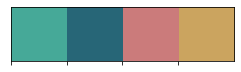

In [21]:
sns.palplot(['#46a998','#276677','#cb7b7b','#cba45f'])

In [22]:
case_count_df = pd.DataFrame(contacts.groupby('channel').id.count()).T
case_count_df.rename(index={'id':'count'}, inplace=True)
case_count_df

channel,call,chat
count,7900,67100


Text(count    41450.0
dtype: float64, -0.25, 'chat')

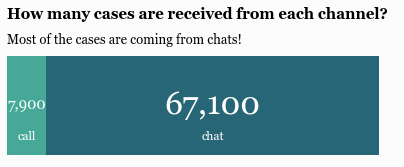

In [23]:
fig = plt.figure(figsize=(7,2))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
fig.patch.set_facecolor('#fbfbfb')
ax.set_facecolor('#fbfbfb')

ax.barh(y=case_count_df.index, width=case_count_df['call'], color='#46a998', label='call')
ax.barh(y=case_count_df.index, width=case_count_df['chat'], left=case_count_df['call'], color='#276677')

ax.set_xticks([])
ax.set_yticks([])
for s in ['top', 'bottom', 'right', 'left']:
    ax.spines[s].set_visible(False)
    
ax.text(0,0.7, 'How many cases are received from each channel?', font='Georgia', fontweight='bold', fontsize=15)
ax.text(0,0.5, 'Most of the cases are coming from chats!', font='Georgia', fontsize=13)

ax.annotate(f"{int(case_count_df['call'][case_count_df.index]):,}",
            xy=(case_count_df['call'][case_count_df.index]/2, case_count_df.index),
           ha='center', va='center', color='white', font='Georgia', size=15)
ax.annotate('call', xy=(case_count_df['call'][case_count_df.index]/2, -0.25),
           ha='center', va='center', color='white', font='Georgia', size=12)
ax.annotate(f"{int(case_count_df['chat'][case_count_df.index]):,}",
            xy=(case_count_df['call'][case_count_df.index]+(case_count_df['chat'][case_count_df.index]/2), case_count_df.index)
           , ha='center', va='center', color='white', font='Georgia', size=32)
ax.annotate('chat', xy=(case_count_df['call'][case_count_df.index]+(case_count_df['chat'][case_count_df.index]/2), -0.25),
           ha='center', va='center', color='white', font='Georgia', size=12)


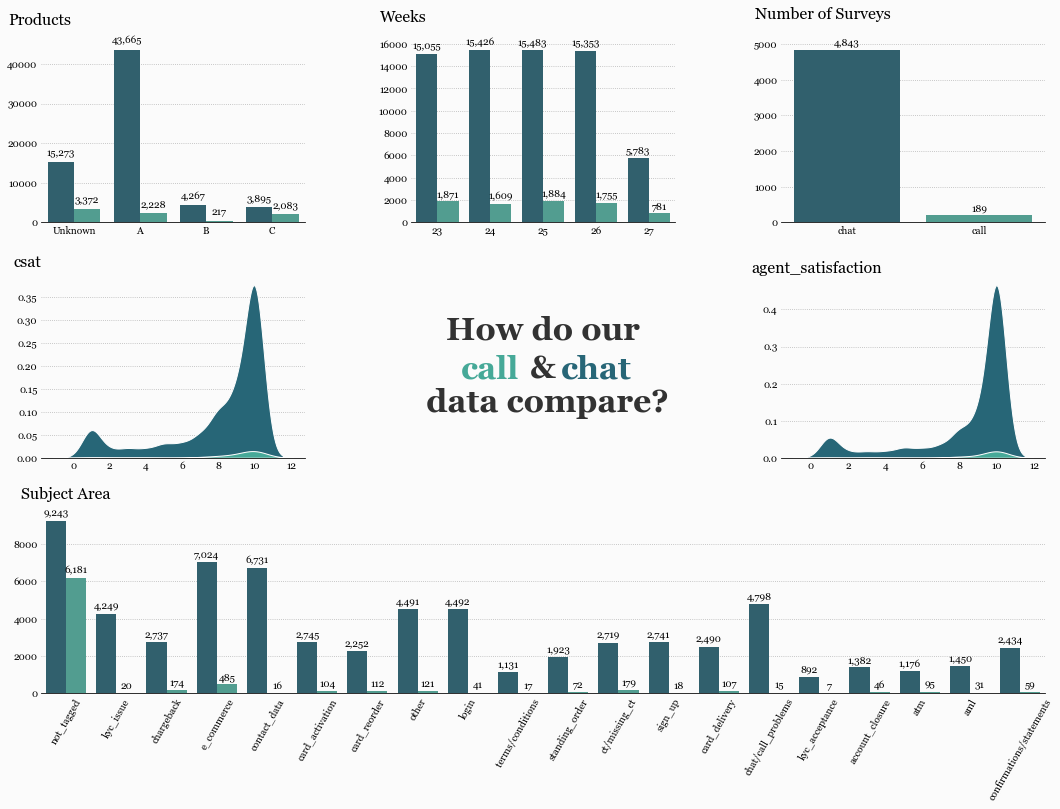

In [24]:
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(3,3)
fig.patch.set_facecolor('#fbfbfb')
gs.update(wspace=0.4, hspace=0.3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0:3])

for i in range(7):
    locals()['ax'+str(i)].set_facecolor('#fbfbfb')

for i in range(7):
    for s in ['left', 'right', 'top']:
        locals()['ax'+str(i)].spines[s].set_visible(False)
        
for i in range(7):
    locals()['ax'+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    
# ax0 ***********************************************************************************************************************
sns.countplot(data=contacts, x='product', hue='channel', palette=['#276677', '#46a998'], ax=ax0)
ax0.grid(axis='y', linestyle=':')
ax0.set_axisbelow(True)
ax0.legend([],[], frameon=False)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.text(-1,50000,'Products', fontweight='bold', font='Georgia', size=16)
for p in ax0.patches:
    ax0.annotate(f"{int(p.get_height()):,}", xy=(p.get_x()+0.2, p.get_height()+2300),
                 font='Georgia', size=10, ha='center', va='center')
    
# ax1 ***********************************************************************************************************************
y1 = contacts.merge(DimDate, how='left', left_on='initiated_date_key', right_on='Date')
sns.countplot(data=y1, x='WeekNum', hue='channel', palette=['#276677', '#46a998'], ax=ax1)
ax1.grid(axis='y', linestyle=":")
ax1.set_axisbelow(True)
ax1.legend([], [], frameon=False)
ax1.set_xlabel('')
ax1.set_ylabel('')
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_height()):,}", xy=(p.get_x()+0.2, p.get_height()+700),
                ha='center', va='center')
ax1.text(-1.1,18000, 'Weeks', fontweight='bold', font='Georgia', size=16)

# ax2 ***********************************************************************************************************************
y1 = contacts.merge(surveys, how='right', left_on='id', right_on='contact_id')
sns.countplot(data=y1, x='channel', ax=ax2, palette=['#276677', '#46a998'])
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis='y', linestyle=":")
ax2.set_axisbelow(True)
for p in ax2.patches:
    ax2.annotate(f"{int(p.get_height()):,}", xy=(p.get_x()+0.4, p.get_height()+200),
                ha='center', va='center')
ax2.text(-0.7,5700, 'Number of Surveys', fontweight='bold', font='Georgia', size=16)

# ax3 ***********************************************************************************************************************
y1 = contacts.merge(surveys, how='left', left_on='id', right_on='contact_id')
sns.kdeplot(data=y1, x=y1.csat, hue='channel', ax=ax3, shade=True, palette=['#46a998', '#276677'], alpha=1,
           edgecolor='white', hue_order=['call', 'chat'])
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.legend([], [], frameon=False)
# ax3.spines['bottom'].set_visible(True)
ax3.grid(axis='y', linestyle=":")
ax3.set_axisbelow(True)
ax3.text(-3.3,0.415, 'csat', fontweight='bold', font='Georgia', size=16)
# ax3.set_xlim(0,10)

# ax4 ***********************************************************************************************************************
ax4.set_xticklabels('')
ax4.set_yticklabels('')
ax4.spines['bottom'].set_visible(False)

ax4.text(0.5,0.5, "How do our\n\n data compare?", size=32, color='#323232', fontweight='bold', ha='center', va='center')
ax4.text(0.3,0.485, "call", size=32, color='#46a998', fontweight='bold', ha='center', va='center')
ax4.text(0.5,0.485, "&", size=32, color='#323232', fontweight='bold', ha='center', va='center')
ax4.text(0.7,0.485, "chat", size=32, color='#276677', fontweight='bold', ha='center', va='center')

# ax5 ***********************************************************************************************************************
sns.kdeplot(data=y1, x=y1.agent_satisfaction, hue='channel', ax=ax5, shade=True, palette=['#46a998', '#276677'], alpha=1,
           edgecolor='white', hue_order=['call', 'chat'])
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.legend([], [], frameon=False)
# ax5.spines['bottom'].set_visible(True)
ax5.grid(axis='y', linestyle=":")
ax5.set_axisbelow(True)
ax5.text(-3.2,0.5, 'agent_satisfaction', fontweight='bold', font='Georgia', size=16)
# ax5.set_xlim(0,10)


# ax6 ***********************************************************************************************************************
sns.countplot(data=contacts, x='cs_tag', hue='channel', ax=ax6, palette=['#276677', '#46a998'])
ax6.tick_params(axis='x', rotation=60)
ax6.set_xlabel('')
ax6.set_ylabel('')
ax6.legend([], [], frameon=False)
ax6.grid(axis='y', linestyle=":")
ax6.set_axisbelow(True)
ax6.text(-0.9,10400, 'Subject Area', fontweight='bold', font='Georgia', size=16)
for p in ax6.patches:
    ax6.annotate(f"{int(p.get_height()):,}", xy=((p.get_x()+0.2, p.get_height()+400)),
                ha='center', va='center')


***

## Task1. Customer Service Overview

a. You'll first want to give a *high-level* overview of what happened in Customer Service, based on the given data. Pick a set of (at least 3) KPIs you deem appropriate and visualise their development. *Hint:* In this sub-task, restrict yourself to **contacts, specialists, surveys**.

Text(0.67, 0.33, '\nAbondoned cases had been removed from dataset,\nbecause handling time for these cases were 0.\n\nThere is a significant difference between chat\nand call handling times, therefore, calculations\nhad been done separately.\n\nFor chats, most of the cases are handled between\n250 to 1000 seconds.\n\nFor calls, most of the cases are handled between\n10 to 250 seconds.\n\nCalls had much less handling time than chats,\nwhich is reasonable.\n\nWe see similar pattern per week for Average\nResolution Time (ART). ART for chats is about\n790 seconds and for call is about 150 seconds\non average.\n\n\n')

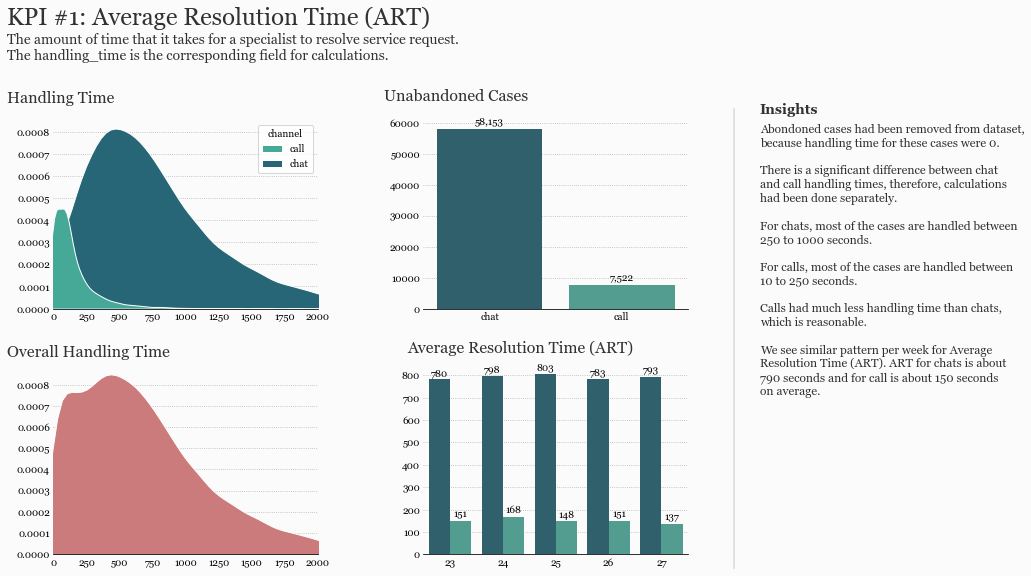

In [25]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.4, hspace=0.3)
fig.patch.set_facecolor('#fbfbfb')

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

for i in range(4):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].set_facecolor('#fbfbfb')

for i in range(4):
    for s in ['left', 'right', 'top']:
        locals()["ax"+str(i)].spines[s].set_visible(False)

# ax0 ***********************************************************************************************************************
y1=contacts[(contacts.handle_time.notnull()) & (contacts.abandoned==False)]
sns.kdeplot(data=y1, x='handle_time', hue='channel', ax=ax0, shade=True, palette=['#46a998', '#276677'], alpha=1,
           edgecolor='white', hue_order=['call', 'chat'], legend=True)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.grid(axis='y', linestyle=":")
ax0.set_axisbelow(True)
ax0.text(-350,0.00093, 'Handling Time', fontweight='bold', font='Georgia', size=16, color='#323232')
ax0.set_xlim(0,2000)
# ax0.legend([],[], frameon=False)

ax0.text(-350,0.00128, 'KPI #1: Average Resolution Time (ART)', fontweight='bold', font='Georgia', size=24, color='#323232')
ax0.text(-350,0.00105,'''
The amount of time that it takes for a specialist to resolve service request.
The handling_time is the corresponding field for calculations.
'''
, size=14, color='#323232', fontweight='light')


# ax1 ***********************************************************************************************************************
sns.countplot(data=y1, x='channel', ax=ax1, palette=['#276677', '#46a998'])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis='y', linestyle=":")
ax1.set_axisbelow(True)
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_height()):,}", xy=(p.get_x()+0.4, p.get_height()+2500),
                ha='center', va='center')
ax1.text(-0.8,67000, 'Unabandoned Cases', fontweight='bold', font='Georgia', size=16, color='#323232')
        

# ax2 ***********************************************************************************************************************
sns.kdeplot(data=y1, x='handle_time', ax=ax2, shade=True, color='#cb7b7b', alpha=1,
           edgecolor='white', hue_order=['call', 'chat'])
ax2.set_xlim(0,2000)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis='y', linestyle=":")
ax2.set_axisbelow(True)
ax2.text(-350,0.00093, 'Overall Handling Time', fontweight='bold', font='Georgia', size=16, color='#323232')
ax2.set_xlim(0,2000)
ax2.legend([],[], frameon=False)


# ax3 ***********************************************************************************************************************
y2 = y1.merge(DimDate, how='left', left_on='initiated_date_key', right_on='Date')[['WeekNum', 'channel', 'handle_time']]
y3 = y2.groupby(['WeekNum', 'channel']).handle_time.mean().reset_index()
sns.barplot(data=y3, x='WeekNum', y='handle_time', hue='channel', ax=ax3,
            palette=['#276677', '#46a998'], hue_order=['chat', 'call'])
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis='y', linestyle=":")
ax3.set_axisbelow(True)
ax3.legend([], [], frameon=False)
for p in ax3.patches:
    ax3.annotate(f"{int(p.get_height()):,}", xy=(p.get_x()+0.2, p.get_height()+30),
                ha='center', va='center')
ax3.text(-0.8,900, 'Average Resolution Time (ART)', fontweight='bold', font='Georgia', size=16, color='#323232')


# ***********************************************************************************************************************
# ***********************************************************************************************************************

l1 = lines.Line2D([0.65, 0.65], [0.1, 0.9], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

fig.text(0.67, 0.89, 'Insights', fontsize=14, fontweight='bold', fontfamily='Georgia',color='#323232')
fig.text(0.67, 0.33, '''
Abondoned cases had been removed from dataset,
because handling time for these cases were 0.

There is a significant difference between chat
and call handling times, therefore, calculations
had been done separately.

For chats, most of the cases are handled between
250 to 1000 seconds.

For calls, most of the cases are handled between
10 to 250 seconds.

Calls had much less handling time than chats,
which is reasonable.

We see similar pattern per week for Average
Resolution Time (ART). ART for chats is about
790 seconds and for call is about 150 seconds
on average.


'''
    , fontsize=12, fontweight='light', fontfamily='Georgia',color='#323232')

Text(0.67, 0.4, '\nContacts made by specialists had been\nremoved from dataset, because in such cases,\nFirst Response Time (FRT) is meaningless.\n\nUnlike ART There is not any significant difference\nbetween chat and call waiting times, but calculations\nhad been done separately due to comparison.\n\nFor both chats and calls, most of the waiting times\nare less than 70 seconds.\n\nExcept the last week, we see similar pattern\nper week for FRT. FRT for chats is about\n55 seconds and for call is about 70 seconds\non average.\n\nUnexpected increase in chats FRT requires more\ninvestigation to find the root causes.\n\n')

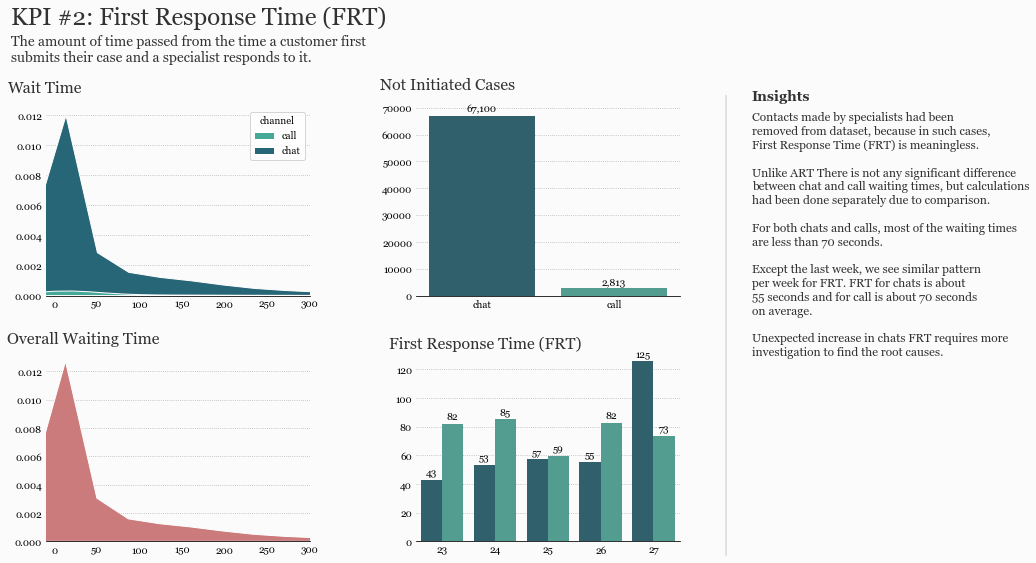

In [26]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.4, hspace=0.3)
fig.patch.set_facecolor('#fbfbfb')

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

for i in range(4):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].set_facecolor('#fbfbfb')

for i in range(4):
    for s in ['left', 'right', 'top']:
        locals()["ax"+str(i)].spines[s].set_visible(False)

# ax0 ***********************************************************************************************************************
y1=contacts[contacts.cst_initiated==True]
sns.kdeplot(data=y1, x='wait_time', hue='channel', ax=ax0, shade=True, palette=['#46a998', '#276677'], alpha=1,
           edgecolor='white', hue_order=['call', 'chat'], legend=True)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.grid(axis='y', linestyle=":")
ax0.set_axisbelow(True)
ax0.text(-55,0.0135, 'Wait Time', fontweight='bold', font='Georgia', size=16, color='#323232')
ax0.set_xlim(-10,300)
# ax0.legend([],[], frameon=False)

ax0.text(-50,0.018, 'KPI #2: First Response Time (FRT)', fontweight='bold', font='Georgia', size=24, color='#323232')
ax0.text(-50,0.0145,'''
The amount of time passed from the time a customer first
submits their case and a specialist responds to it.
'''
, size=14, color='#323232', fontweight='light')


# ax1 ***********************************************************************************************************************
sns.countplot(data=y1, x='channel', ax=ax1, palette=['#276677', '#46a998'])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.grid(axis='y', linestyle=":")
ax1.set_axisbelow(True)
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_height()):,}", xy=(p.get_x()+0.4, p.get_height()+2500),
                ha='center', va='center')
ax1.text(-0.77,77000, 'Not Initiated Cases', fontweight='bold', font='Georgia', size=16, color='#323232')
        

# ax2 ***********************************************************************************************************************
sns.kdeplot(data=y1, x='wait_time', ax=ax2, shade=True, color='#cb7b7b', alpha=1,
           edgecolor='white', hue_order=['call', 'chat'])
ax2.set_xlim(0,2000)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis='y', linestyle=":")
ax2.set_axisbelow(True)
ax2.text(-55,0.014, 'Overall Waiting Time', fontweight='bold', font='Georgia', size=16, color='#323232')
ax2.set_xlim(0,2000)
ax2.legend([],[], frameon=False)
ax2.set_xlim(-10,300)


# ax3 ***********************************************************************************************************************
y2 = y1.merge(DimDate, how='left', left_on='initiated_date_key', right_on='Date')[['WeekNum', 'channel', 'wait_time']]
y3 = y2.groupby(['WeekNum', 'channel']).wait_time.mean().reset_index()
sns.barplot(data=y3, x='WeekNum', y='wait_time', hue='channel', ax=ax3,
            palette=['#276677', '#46a998'], hue_order=['chat', 'call'])
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis='y', linestyle=":")
ax3.set_axisbelow(True)
ax3.legend([], [], frameon=False)
for p in ax3.patches:
    ax3.annotate(f"{int(p.get_height()):,}", xy=(p.get_x()+0.2, p.get_height()+5),
                ha='center', va='center')
ax3.text(-1,135, 'First Response Time (FRT)', fontweight='bold', font='Georgia', size=16, color='#323232')


# ***********************************************************************************************************************
# ***********************************************************************************************************************

l1 = lines.Line2D([0.65, 0.65], [0.1, 0.9], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

fig.text(0.67, 0.89, 'Insights', fontsize=14, fontweight='bold', fontfamily='Georgia',color='#323232')
fig.text(0.67, 0.40, '''
Contacts made by specialists had been
removed from dataset, because in such cases,
First Response Time (FRT) is meaningless.

Unlike ART There is not any significant difference
between chat and call waiting times, but calculations
had been done separately due to comparison.

For both chats and calls, most of the waiting times
are less than 70 seconds.

Except the last week, we see similar pattern
per week for FRT. FRT for chats is about
55 seconds and for call is about 70 seconds
on average.

Unexpected increase in chats FRT requires more
investigation to find the root causes.

'''
    , fontsize=12, fontweight='light', fontfamily='Georgia',color='#323232')

Text(0.67, 0.59, '\nThe overall CSAT of the company is about 8.\n\nSatisfaction in the first five weeks was\non the fixed line 8. \n\nSudden fall and subsequent ascent in weeks\n27 to 30 requires more analysis to find the\nroot causes.\n\nUsually in CSAT analysis we have to\nlook back.\n')

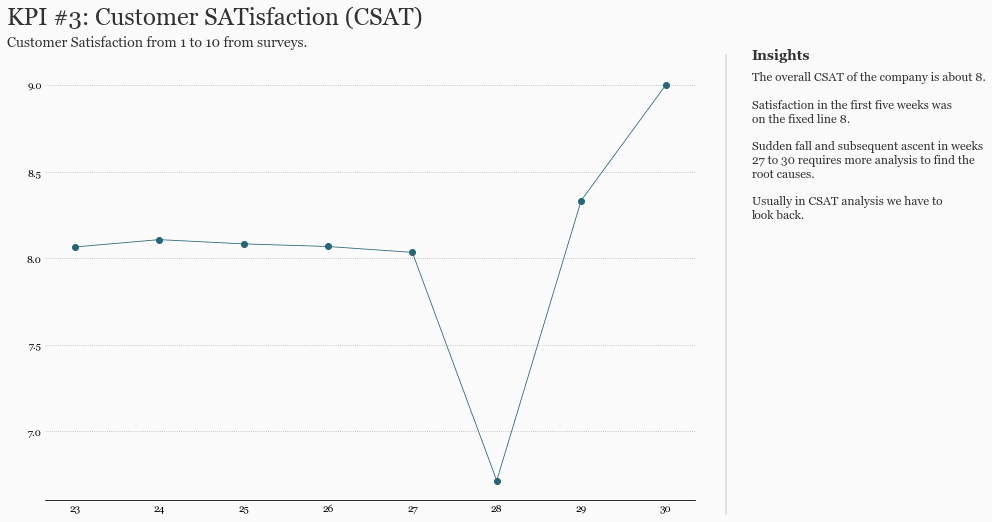

In [27]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(2,3)
ax0 = fig.add_subplot(gs[:2,:2])
fig.patch.set_facecolor('#fbfbfb')
ax0.set_facecolor('#fbfbfb')
ax0.tick_params(axis=u'both', which=u'both', length=0)

for s in ['left', 'right', 'top']:
    ax0.spines[s].set_visible(False)

# ax0 ***********************************************************************************************************************
y1 = surveys.merge(DimDate, how='left', left_on='response_date', right_on='Date')
y2 = y1.groupby('WeekNum').csat.mean().reset_index()

ax0.plot(y2['WeekNum'], y2['csat'], marker='o', color='#276677', linewidth=0.8)

ax0.grid(axis='y', linestyle=":")
ax0.set_axisbelow(True)
ax0.text(22.2,9.35, 'KPI #3: Customer SATisfaction (CSAT)', fontweight='bold', font='Georgia', size=24, color='#323232')
ax0.text(22.2,9.13,'''
Customer Satisfaction from 1 to 10 from surveys.
'''
, size=14, color='#323232', fontweight='light')

# ***********************************************************************************************************************
# ***********************************************************************************************************************

l1 = lines.Line2D([0.65, 0.65], [0.1, 0.9], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

fig.text(0.67, 0.89, 'Insights', fontsize=14, fontweight='bold', fontfamily='Georgia',color='#323232')
fig.text(0.67, 0.59, '''
The overall CSAT of the company is about 8.

Satisfaction in the first five weeks was
on the fixed line 8. 

Sudden fall and subsequent ascent in weeks
27 to 30 requires more analysis to find the
root causes.

Usually in CSAT analysis we have to
look back.
'''
    , fontsize=12, fontweight='light', fontfamily='Georgia',color='#323232')

Other KPIs such as Missed Calls can also be considered and need more attention!

************************************************************************

b. As we need to communicate to Workforce (WF) Management how much resources will be needed in the future, please determine how many members of staff will be needed per day of the week for the next 7 days after the last day in the dataset. You don't need to separate external and internal specialists as this will be done by the WF Manager.

In [28]:
# In order to answer this question, some more information about Service level and Employee Capacity is required.
# As we can see below, the total number of cases is 75000.
len(contacts)

75000

In [29]:
# So, the average weekly cases for 5 week is 15000 and we have 200 specialist in total to support customers.
sum(specialists.hired_at.notnull())

200

In [30]:
# We can see that each specialist handles 75 cases on average. So assume that you want to handle more cases by 50%.
# In other words, you want to handle less cases and increase response speed. To achieve this goal, you need to add
# 100 new specialists which handle 50 cases on average.

********************************************

## 2. CS Specialists

Create weekly leaderboards: breakdown per week for the top 5 inhouse CS specialists with respect to 3 KPIs that you think are suitable for measuring specialist performance. Plot the leaderboards showing full names and scores.

Text(0.67, 0.58, '\n19 specialists in 8 weeks were among top 5s.\n\nIt seems that Channing Tatum with 3\nappearances in top 5s is better than\nBrad Pitt, at least in customer service :)\n\n8 specialists were in top 5s more than once.\n\n')

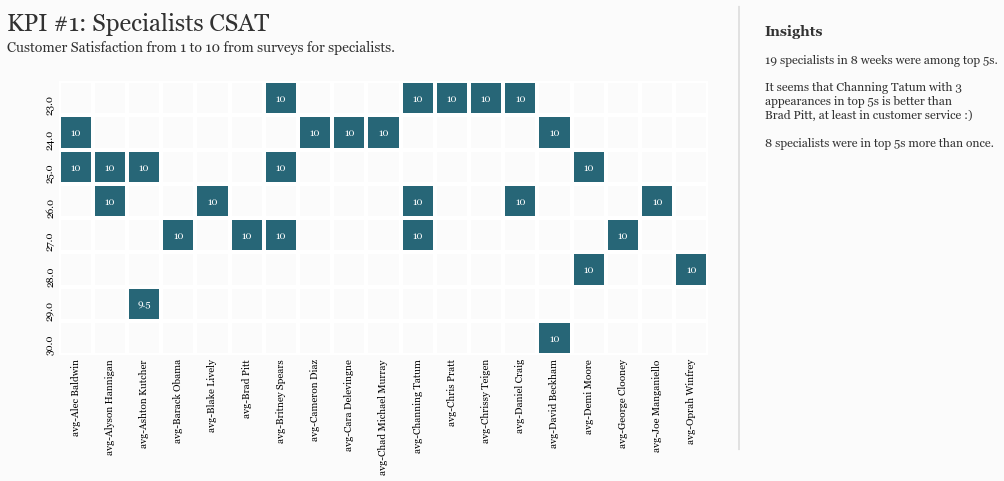

In [31]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(2,3)
ax0 = fig.add_subplot(gs[:2,:2])
fig.patch.set_facecolor('#fbfbfb')
ax0.set_facecolor('#fbfbfb')
ax0.tick_params(axis=u'both', which=u'both', length=0)

for s in ['left', 'right', 'top']:
    ax0.spines[s].set_visible(False)

# ax0 ***********************************************************************************************************************
y1 = surveys.merge(DimDate, how='left', left_on='response_date', right_on='Date')
y2 = y1.merge(contacts, how='left', left_on='contact_id', right_on='id')
y3 = y2.merge(specialists, how='right', left_on='specialist_id', right_on='id')
y4 = y3[y3.is_inhouse_y==True]
y5 = y4[['WeekNum', 'full_name', 'agent_satisfaction']]
y6 = y5.groupby(['WeekNum', 'full_name'])['agent_satisfaction'].mean().reset_index(name='avg')
y7 = y6.groupby('WeekNum').apply(lambda x: x.nlargest(5, 'avg')).reset_index(drop=True)
y8 = pd.pivot_table(data=y7, index=y7.WeekNum, columns=y7.full_name)

sns.heatmap(data=y8, ax=ax0, vmin=-0.01, vmax=0.075, annot=True, square=True, cbar=False,
            cmap=['#276677'], linewidths=3, annot_kws={"fontsize":10},
            cbar_kws={"orientation":"horizontal"})

# ax0.grid(axis='y', linestyle=":")
ax0.set_axisbelow(True)
ax0.set_xlabel('')
ax0.set_ylabel('')

ax0.text(-1.5,-1.5, 'KPI #1: Specialists CSAT', fontweight='bold', font='Georgia', size=24, color='#323232')
ax0.text(-1.5,-0.4,'''
Customer Satisfaction from 1 to 10 from surveys for specialists.
'''
, size=14, color='#323232', fontweight='light')

# ***********************************************************************************************************************
# ***********************************************************************************************************************

l1 = lines.Line2D([0.65, 0.65], [0.1, 0.87], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

fig.text(0.67, 0.82, 'Insights', fontsize=14, fontweight='bold', fontfamily='Georgia',color='#323232')
fig.text(0.67, 0.58, '''
19 specialists in 8 weeks were among top 5s.

It seems that Channing Tatum with 3
appearances in top 5s is better than
Brad Pitt, at least in customer service :)

8 specialists were in top 5s more than once.

'''
    , fontsize=12, fontweight='light', fontfamily='Georgia',color='#323232')

Text(0.67, 0.53, '\n19 specialists in 5 weeks were among top 5s.\n\nTom Cruise was among top 5s in the first\nand last week. Maybe in the meantime, he\nwas on an impossible mission :)\n\n6 specialists were in top 5s more than once.\n\n')

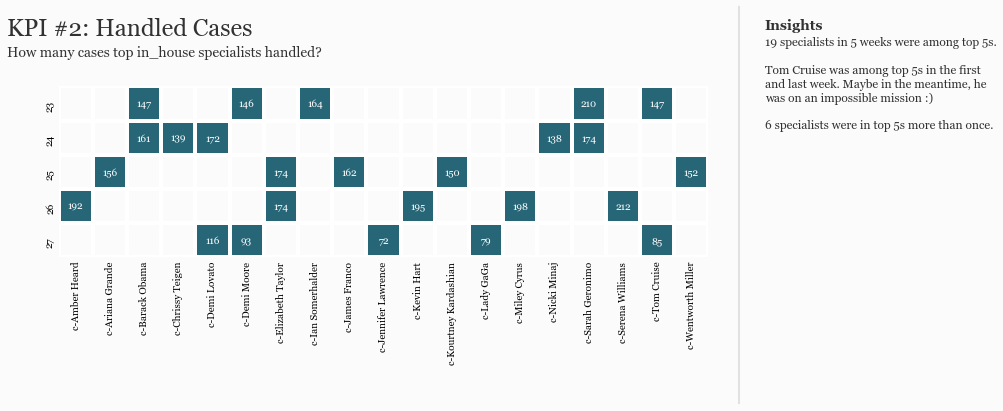

In [32]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(2,3)
ax0 = fig.add_subplot(gs[:2,:2])
fig.patch.set_facecolor('#fbfbfb')
ax0.set_facecolor('#fbfbfb')
ax0.tick_params(axis=u'both', which=u'both', length=0)

for s in ['left', 'right', 'top']:
    ax0.spines[s].set_visible(False)

# ax0 ***********************************************************************************************************************
y1 = contacts.merge(DimDate, how='left', left_on='initiated_date_key', right_on='Date')
y2 = y1.merge(specialists, how='left', left_on='specialist_id', right_on='id')
y3 = y2[(y2.hired_at.notnull()) & (y2.is_inhouse_y==True)]
y4 = y3[['WeekNum', 'full_name']]
y5 = y4.groupby(['WeekNum', 'full_name']).size().reset_index(name='c')
y6 = y5.groupby('WeekNum').apply(lambda x: x.nlargest(5, 'c')).reset_index(drop=True)
y7 = pd.pivot_table(data=y6, index=y6.WeekNum, columns=y6.full_name)

sns.heatmap(data=y7, ax=ax0, vmin=-0.01, vmax=0.075, annot=True, square=True, cbar=False, fmt='.3g',
            cmap=['#276677'], linewidths=3, annot_kws={"fontsize":10},
            cbar_kws={"orientation":"horizontal"})

# ax0.grid(axis='y', linestyle=":")
ax0.set_axisbelow(True)
ax0.set_xlabel('')
ax0.set_ylabel('')

ax0.text(-1.5,-1.5, 'KPI #2: Handled Cases', fontweight='bold', font='Georgia', size=24, color='#323232')
ax0.text(-1.5,-0.4,'''
How many cases top in_house specialists handled?
'''
, size=14, color='#323232', fontweight='light')

# ***********************************************************************************************************************
# ***********************************************************************************************************************

l1 = lines.Line2D([0.65, 0.65], [0.1, 0.79], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

fig.text(0.67, 0.75, 'Insights', fontsize=14, fontweight='bold', fontfamily='Georgia',color='#323232')
fig.text(0.67, 0.53, '''
19 specialists in 5 weeks were among top 5s.

Tom Cruise was among top 5s in the first
and last week. Maybe in the meantime, he
was on an impossible mission :)

6 specialists were in top 5s more than once.

'''
    , fontsize=12, fontweight='light', fontfamily='Georgia',color='#323232')

Text(0.67, 0.57, '\n15 specialists in 5 weeks were among top 5s.\n\nMeryl Streep and Donuld Trump are doing\nwell. They had the best performances.\n\n4 specialists were in top 5s more than once.\n\n')

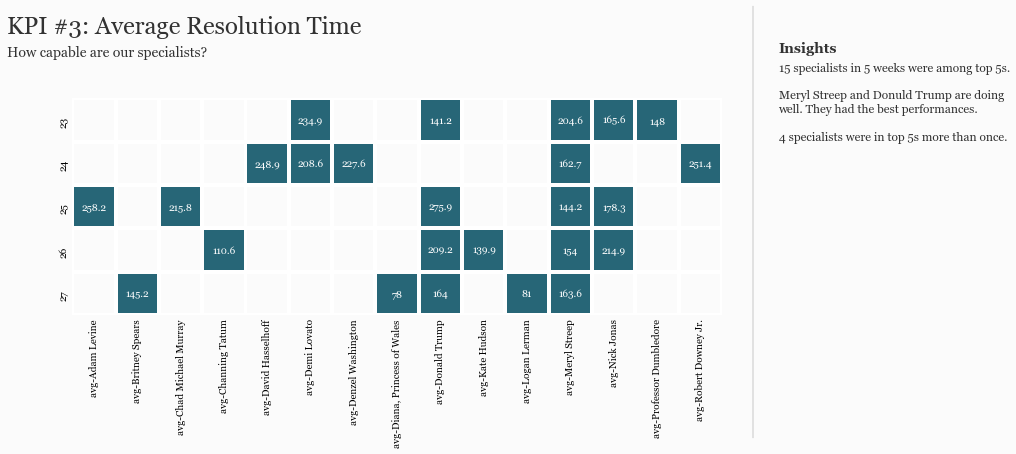

In [33]:
fig = plt.figure(figsize=(18,8))
gs = fig.add_gridspec(2,3)
ax0 = fig.add_subplot(gs[:2,:2])
fig.patch.set_facecolor('#fbfbfb')
ax0.set_facecolor('#fbfbfb')
ax0.tick_params(axis=u'both', which=u'both', length=0)

for s in ['left', 'right', 'top']:
    ax0.spines[s].set_visible(False)

# ax0 ***********************************************************************************************************************
y1 = contacts.merge(DimDate, how='left', left_on='initiated_date_key', right_on='Date')
y2 = y1.merge(specialists, how='left', left_on='specialist_id', right_on='id')
y3 = y2[(y2.hired_at.notnull()) & (y2.is_inhouse_y==True)]
y4 = y3[['WeekNum', 'full_name', 'handle_time']]
y5 = y4.groupby(['WeekNum', 'full_name']).handle_time.mean().reset_index(name='avg')
y6 = y5.groupby('WeekNum').apply(lambda x: x.nsmallest(5, 'avg')).reset_index(drop=True)
y7 = pd.pivot_table(data=y6, index=y6.WeekNum, columns=y6.full_name)

sns.heatmap(data=y7, ax=ax0, vmin=-0.01, vmax=0.075, annot=True, square=True, cbar=False, fmt='.4g',
            cmap=['#276677'], linewidths=3, annot_kws={"fontsize":10},
            cbar_kws={"orientation":"horizontal"})

# ax0.grid(axis='y', linestyle=":")
ax0.set_axisbelow(True)
ax0.set_xlabel('')
ax0.set_ylabel('')

ax0.text(-1.5,-1.5, 'KPI #3: Average Resolution Time', fontweight='bold', font='Georgia', size=24, color='#323232')
ax0.text(-1.5,-0.6,'''
How capable are our specialists?
'''
, size=14, color='#323232', fontweight='light')

# ***********************************************************************************************************************
# ***********************************************************************************************************************

l1 = lines.Line2D([0.65, 0.65], [0.1, 0.85], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

fig.text(0.67, 0.77, 'Insights', fontsize=14, fontweight='bold', fontfamily='Georgia',color='#323232')
fig.text(0.67, 0.57, '''
15 specialists in 5 weeks were among top 5s.

Meryl Streep and Donuld Trump are doing
well. They had the best performances.

4 specialists were in top 5s more than once.

'''
    , fontsize=12, fontweight='light', fontfamily='Georgia',color='#323232')